In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("unemployment.csv")

In [3]:
# spreadsheet export added a bunch of garbage columns
df = df.iloc[:, : 3]

In [4]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001 Jan,4.2,6.4
1,2001 Feb,4.2,5.4
2,2001 Mar,4.3,5.4
3,2001 Apr,4.4,5.2
4,2001 May,4.3,5.3


In [5]:
# let's fix those dates
df["Year"] = df["Year"].apply(lambda x: datetime.strptime(x, '%Y %b').date())

In [6]:
def remove_chart_junk(axis, numticks, labelsize):

    # reduce ticks
    axis.locator_params(nbins=numticks)

    # remove unnecessary borders
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    axis.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))

    # prettify tick labels
    axis.tick_params(axis='both',
                     which='both',
                     length=0,
                     labelsize=labelsize,
                     pad=labelsize * 0.66,
                     labelcolor=(0.25, 0.25, 0.25))
    return axis


In [7]:
def timeseries(in_dates, events, labels = ["", ""], title="", numticks=3, labelsize=12, size=(10, 10),):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    numticks = 5

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')

    ax = remove_chart_junk(ax, numticks, labelsize)

    dates = np.array(in_dates)
    dates_sorted = (np.sort(dates))
    event1 = np.array(events[0])[np.argsort(dates)]
    p1 = ax.plot(dates_sorted, event1, 'k-', label=labels[0])
    if len(events) > 1:
        event2 = np.array(events[1])[np.argsort(dates)]
        p2 = ax.plot(dates_sorted, event2, color=(0.6, 0.6, 0.6), linestyle='-', label=labels[1])
        leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, framealpha=0)
        leg.get_texts()[1].set_color((0.4, 0.4, 0.4))
    return fig

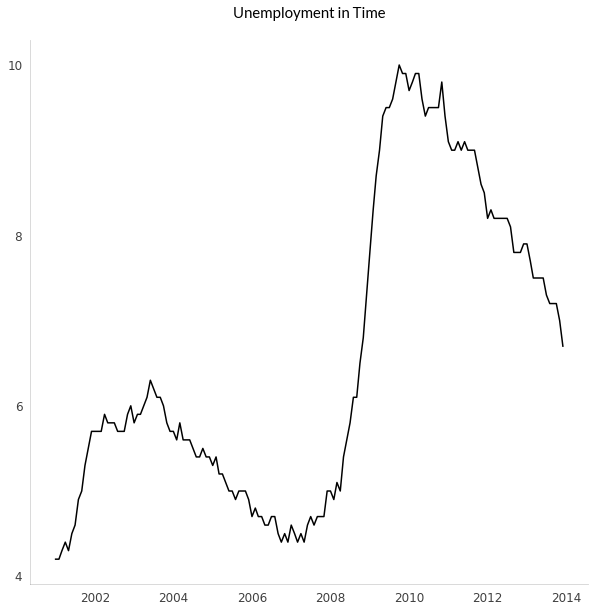

In [8]:
fig = timeseries(df["Year"], [df["Unemployment Rate"]], ["unemployment"], "Unemployment in Time")

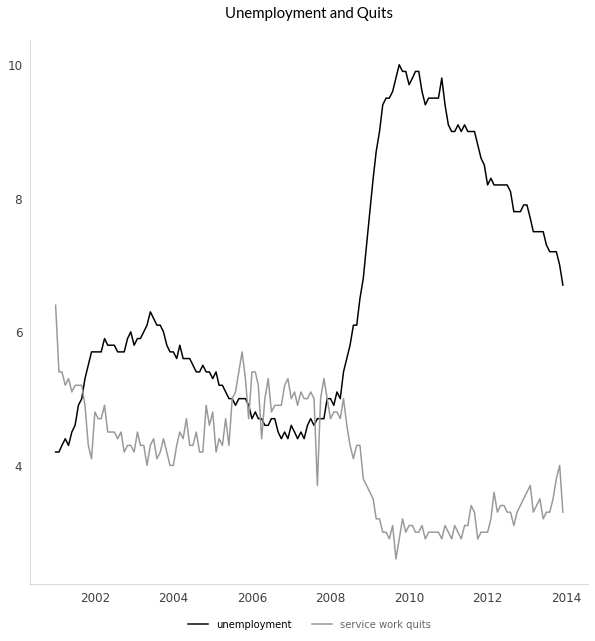

In [9]:
fig2 = timeseries(df["Year"], [df["Unemployment Rate"], df["Accommodation and food services Quit rate"]], ["unemployment", "service work quits"], "Unemployment and Quits")

In [10]:
# let's make sure this works right with out-of-order rows.
disorganized = df.sample(frac=1)

In [11]:
disorganized.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
149,2013-06-01,7.5,3.2
72,2007-01-01,4.6,5.0
135,2012-04-01,8.2,3.3
66,2006-07-01,4.7,4.8
43,2004-08-01,5.4,4.5


In [12]:
df.head()

,Year,Unemployment Rate,Accommodation and food services Quit rate
0,2001-01-01,4.2,6.4
1,2001-02-01,4.2,5.4
2,2001-03-01,4.3,5.4
3,2001-04-01,4.4,5.2
4,2001-05-01,4.3,5.3


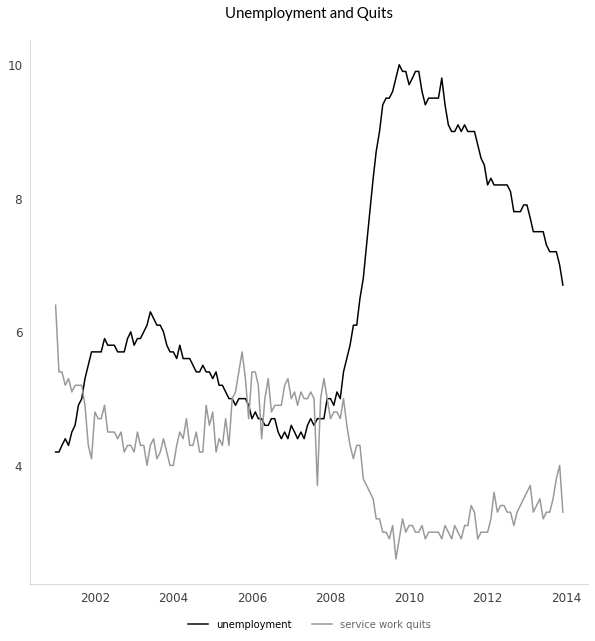

In [13]:
fig3 = timeseries(disorganized["Year"], [disorganized["Unemployment Rate"], disorganized["Accommodation and food services Quit rate"]], ["unemployment", "service work quits"], "Unemployment and Quits")

In [14]:
fig2.savefig("timeseries.svg", format="svg")